## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Load the Data 

In [2]:
student_data = pd.read_csv(r'C:\Users\Desktop\USF-DS\educationstats.csv')

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance	                     4424 non-null   int64  
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nacionality                                     4424 non-null   int64  
 9   Mother's qualification                   

In [4]:
student_data.head()

Unnamed: 0  Marital status  Application mode  Application order  Course  \
0           0               1                17                  5     171   
1           1               1                15                  1    9254   
2           2               1                 1                  5    9070   
3           3               1                17                  2    9773   
4           4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           122.0            1                      19  ...   
1                           160.0            1                       1  ...   
2                           122.0            1                      37  ...   
3                           122.0            1                      38  ...   
4                           100.0            1                      37  ...   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  Country Name  \
0             1.4  1.74   Dropout      Portugal   
1            -0.3  0.79  Graduate      Portugal   
2             1.4  1.74   Dropout      Portugal   
3            -0.8 -3.12  Graduate      Portugal   
4            -0.3  0.79  Graduate      Portugal   

   Adj net enrollment of lower secondary  \
0                              85.185539   
1                              85.185539   
2                              85.185539   
3                              85.185539   
4                              85.185539   

   Tertiary educ enrollment(all programs)  
0                                362200.0  
1                                362200.0  
2                                362200.0  
3                                362200.0  
4                                362200.0  

[5 rows x 41 columns]

## Exploring the Data 

#### Summary Stats 

In [5]:
student_data.describe()

Unnamed: 0  Marital status  Application mode  Application order  \
count  4424.000000     4424.000000       4424.000000        4424.000000   
mean   2211.500000        1.178571         18.669078           1.727848   
std    1277.243125        0.605747         17.484682           1.313793   
min       0.000000        1.000000          1.000000           0.000000   
25%    1105.750000        1.000000          1.000000           1.000000   
50%    2211.500000        1.000000         17.000000           1.000000   
75%    3317.250000        1.000000         39.000000           2.000000   
max    4423.000000        6.000000         57.000000           9.000000   

            Course  Daytime/evening attendance\t  Previous qualification  \
count  4424.000000                   4424.000000             4424.000000   
mean   8856.642631                      0.890823                4.577758   
std    2063.566416                      0.311897               10.216592   
min      33.000000                      0.000000                1.000000   
25%    9085.000000                      1.000000                1.000000   
50%    9238.000000                      1.000000                1.000000   
75%    9556.000000                      1.000000                1.000000   
max    9991.000000                      1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4424.000000  4424.000000             4424.000000   
mean                       132.613314     1.873192               19.561935   
std                         13.188332     6.914514               15.603186   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       ...  Curricular units 2nd sem (enrolled)  \
count  ...                          4424.000000   
mean   ...                             6.232143   
std    ...                             2.195951   
min    ...                             0.000000   
25%    ...                             5.000000   
50%    ...                             6.000000   
75%    ...                             7.000000   
max    ...                            23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000                       4424.000000   
mean                              4.435805                         10.230206   
std                               3.014764                          5.210808   
min                               0.000000                          0.000000   
25%                               2.000000                         10.750000   
50%                               5.000000                         12.200000   
75%                               6.000000                         13.333333   
max                              20.000000                         18.571429   

       Curricular units 2nd sem (without evaluations)  Unemployment rate  \
count                                     4424.000000        4424.000000   
mean                                         0.150316          11.566139   
std                                          0.753774           2.663850   
min              

In [6]:
# Count of participants per country 
student_data.value_counts('Country Name')

Country Name
Portugal          4314
Brazil              38
Soa Tome            14
Cabo Verde          13
Spain               13
Guinea               5
Moldova              3
Ukraine              3
Italy                3
Russia               2
Romania              2
Anogola              2
Mozambique           2
Mexico               2
Germany              2
Netherlands          1
Lithuania            1
Cuba                 1
Turkey               1
Colombia             1
United Kingdom       1
dtype: int64

In [7]:
total_students = student_data.value_counts('Country Name').sum()
total_students

4424

In [8]:
participants = pd.DataFrame(student_data['Country Name'].value_counts(normalize=True))
print(participants)

                Country Name
Portugal            0.975136
Brazil              0.008590
Soa Tome            0.003165
Cabo Verde          0.002939
Spain               0.002939
Guinea              0.001130
Moldova             0.000678
Italy               0.000678
Ukraine             0.000678
Anogola             0.000452
Mexico              0.000452
Romania             0.000452
Mozambique          0.000452
Germany             0.000452
Russia              0.000452
Turkey              0.000226
Netherlands         0.000226
Colombia            0.000226
Cuba                0.000226
United Kingdom      0.000226
Lithuania           0.000226


In [9]:
# Reset index by nationality('Counrty Name') 
student_success = student_data.set_index('Country Name')

In [10]:
student_success.head()

Unnamed: 0  Marital status  Application mode  Application order  \
Country Name                                                                    
Portugal               0               1                17                  5   
Portugal               1               1                15                  1   
Portugal               2               1                 1                  5   
Portugal               3               1                17                  2   
Portugal               4               2                39                  1   

              Course  Daytime/evening attendance\t  Previous qualification  \
Country Name                                                                 
Portugal         171                             1                       1   
Portugal        9254                             1                       1   
Portugal        9070                             1                       1   
Portugal        9773                             1                       1   
Portugal        8014                             0                       1   

              Previous qualification (grade)  Nacionality  \
Country Name                                                
Portugal                               122.0            1   
Portugal                               160.0            1   
Portugal                               122.0            1   
Portugal                               122.0            1   
Portugal                               100.0            1   

              Mother's qualification  ...  \
Country Name                          ...   
Portugal                          19  ...   
Portugal                           1  ...   
Portugal                          37  ...   
Portugal                          38  ...   
Portugal                          37  ...   

              Curricular units 2nd sem (evaluations)  \
Country Name                                           
Portugal                                           0   
Portugal                                           6   
Portugal                                           0   
Portugal                                          10   
Portugal                                           6   

              Curricular units 2nd sem (approved)  \
Country Name                                        
Portugal                                        0   
Portugal                                        6   
Portugal                                        0   
Portugal                                        5   
Portugal                                        6   

              Curricular units 2nd sem (grade)  \
Country Name                                     
Portugal                              0.000000   
Portugal                             13.666667   
Portugal                              0.000000   
Portugal                             12.400000   
Portugal                             13.000000   

              Curricular units 2nd sem (without evaluations)  \
Country Name                                                   
Portugal                                                   0   
Portugal                                                   0   
Portugal                                                   0   
Portugal                                                   0   
Portugal                                                   0   

              Unemployment rate  Inflation rate   GDP    Target  \
Country Name                                                      
Portugal                   10.8             1.4  1.74   Dropout   
Portugal                   13.9            -0.3  0.79  Graduate   
Portugal                   10.8             1.4  1.74   Dropout   
Portugal                    9.4            -0.8 -3.12  Graduate   
Portugal                   13.9            -0.3  0.79  Graduate   

              Adj net enrollment of lower secondary  \
Country Name                                          
Portugal  

In [11]:
# Renaming column : 'Unnamed: 0' to 'Student ID'
student_success.rename(columns = {'Unnamed: 0':'Student ID'}, inplace = True)

In [12]:
student_success.head()

Student ID  Marital status  Application mode  Application order  \
Country Name                                                                    
Portugal               0               1                17                  5   
Portugal               1               1                15                  1   
Portugal               2               1                 1                  5   
Portugal               3               1                17                  2   
Portugal               4               2                39                  1   

              Course  Daytime/evening attendance\t  Previous qualification  \
Country Name                                                                 
Portugal         171                             1                       1   
Portugal        9254                             1                       1   
Portugal        9070                             1                       1   
Portugal        9773                             1                       1   
Portugal        8014                             0                       1   

              Previous qualification (grade)  Nacionality  \
Country Name                                                
Portugal                               122.0            1   
Portugal                               160.0            1   
Portugal                               122.0            1   
Portugal                               122.0            1   
Portugal                               100.0            1   

              Mother's qualification  ...  \
Country Name                          ...   
Portugal                          19  ...   
Portugal                           1  ...   
Portugal                          37  ...   
Portugal                          38  ...   
Portugal                          37  ...   

              Curricular units 2nd sem (evaluations)  \
Country Name                                           
Portugal                                           0   
Portugal                                           6   
Portugal                                           0   
Portugal                                          10   
Portugal                                           6   

              Curricular units 2nd sem (approved)  \
Country Name                                        
Portugal                                        0   
Portugal                                        6   
Portugal                                        0   
Portugal                                        5   
Portugal                                        6   

              Curricular units 2nd sem (grade)  \
Country Name                                     
Portugal                              0.000000   
Portugal                             13.666667   
Portugal                              0.000000   
Portugal                             12.400000   
Portugal                             13.000000   

              Curricular units 2nd sem (without evaluations)  \
Country Name                                                   
Portugal                                                   0   
Portugal                                                   0   
Portugal                                                   0   
Portugal                                                   0   
Portugal                                                   0   

              Unemployment rate  Inflation rate   GDP    Target  \
Country Name                                                      
Portugal                   10.8             1.4  1.74   Dropout   
Portugal                   13.9            -0.3  0.79  Graduate   
Portugal                   10.8             1.4  1.74   Dropout   
Portugal                    9.4            -0.8 -3.12  Graduate   
Portugal                   13.9            -0.3  0.79  Graduate   

              Adj net enrollment of lower secondary  \
Country Name                                          
Portugal  

### Education Stats per Country 

In [13]:
# Secondary Education stats ( Top 5)
secondary_educ = student_success['Adj net enrollment of lower secondary'].drop_duplicates()
secondary_educ.sort_values(ascending=False).head()

Country Name
Lithuania         99.405693
United Kingdom    96.082527
Spain             94.076622
Ukraine           93.078461
Romania           89.185013
Name: Adj net enrollment of lower secondary, dtype: float64

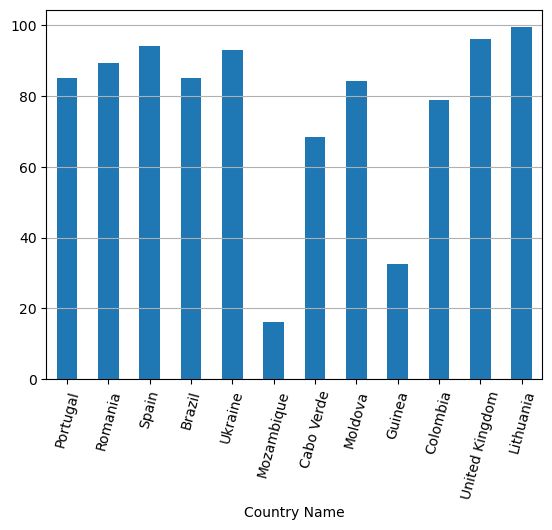

In [14]:
# Bar plot of secondary education 
ax = secondary_educ.plot.bar(x='Country', rot=75)
ax.grid(axis='y')

In [15]:
# Tertiary education Stats ( Top 5) 
tertiary_educ = student_success['Tertiary educ enrollment(all programs)'].drop_duplicates()
tertiary_educ.sort_values(ascending=False).head()

Country Name
Brazil            8072146.00
Turkey            5472521.00
Mexico            3419391.00
Germany           2912203.50
United Kingdom    2352932.75
Name: Tertiary educ enrollment(all programs), dtype: float64

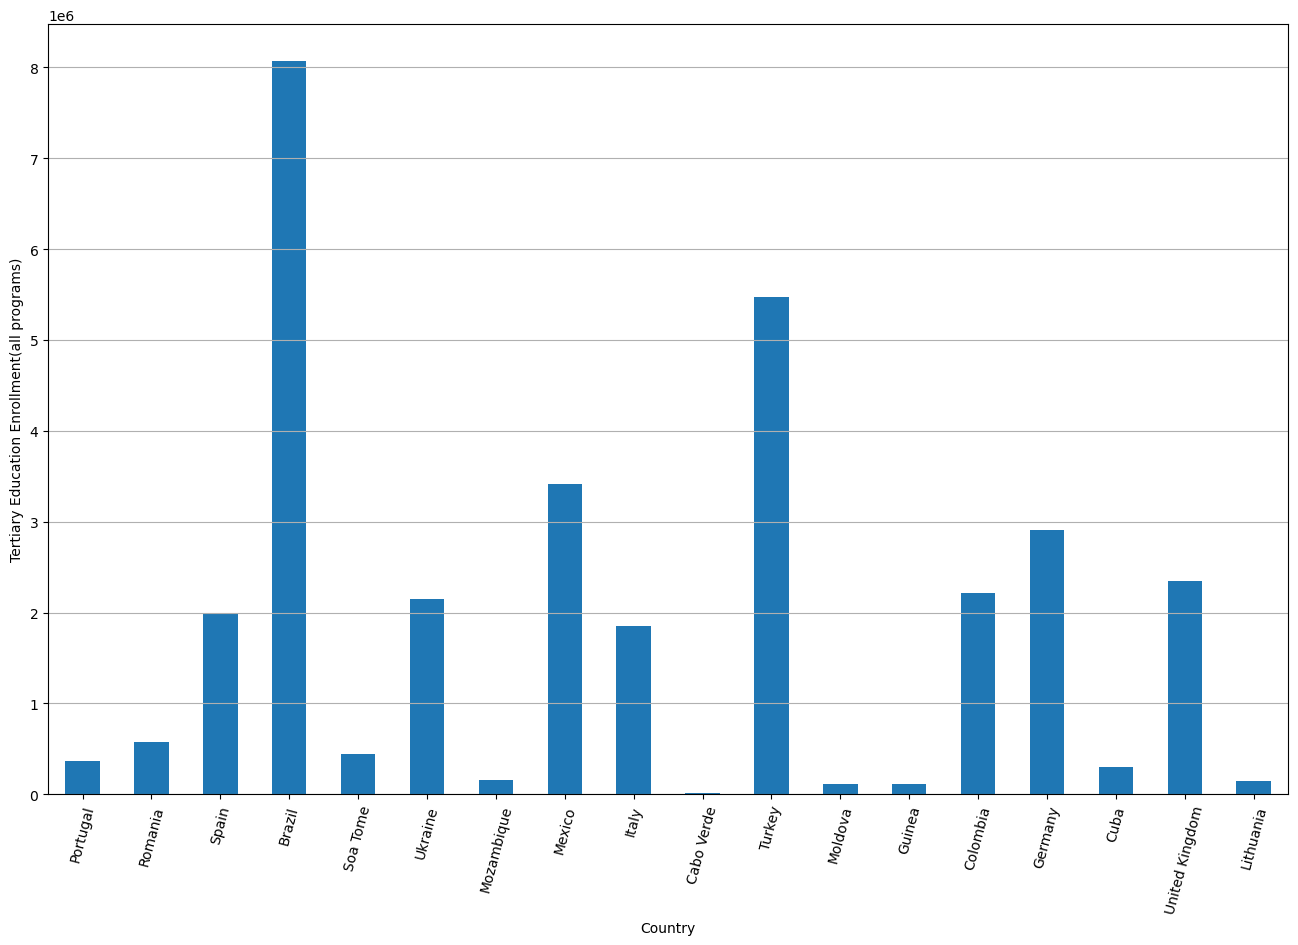

In [16]:
# Bar plot of Tertiary education 
ax = tertiary_educ.plot.bar(x='Country', rot=75, figsize=(16,10))
ax.set_ylabel('Tertiary Education Enrollment(all programs)')
ax.set_xlabel('Country')
ax.grid(axis='y')

###### Admisson Grades per Country 

In [17]:
# Enrollment grades per participants per counrty 
admis_grade = student_success["Admission grade"]
admis_grade

Country Name
Portugal      127.3
Portugal      142.5
Portugal      124.8
Portugal      119.6
Portugal      141.5
              ...  
Portugal      122.2
Russia        119.0
Portugal      149.5
Portugal      153.8
Cabo Verde    152.0
Name: Admission grade, Length: 4424, dtype: float64

In [18]:
admis_grade['Portugal'].mean()

126.91968011126565

In [19]:
admis_grade['Brazil'].mean()

121.17631578947368

In [20]:
admis_grade['Soa Tome'].mean()

132.80714285714285

In [21]:
admis_grade['Cabo Verde'].mean()

143.4923076923077

In [22]:
admis_grade['Spain'].mean()

128.55384615384617

In [23]:
admis_grade['Guinea'].mean()

124.38

In [24]:
admis_grade = pd.DataFrame(admis_grade)
admis_grade.reset_index(inplace=True)

In [25]:
admis_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     4424 non-null   object 
 1   Admission grade  4424 non-null   float64
dtypes: float64(1), object(1)
memory usage: 69.2+ KB


In [26]:
admis_grade.head()

Country Name  Admission grade
0     Portugal            127.3
1     Portugal            142.5
2     Portugal            124.8
3     Portugal            119.6
4     Portugal            141.5

Text(0.5, 1.0, 'Admission Grades per Country')

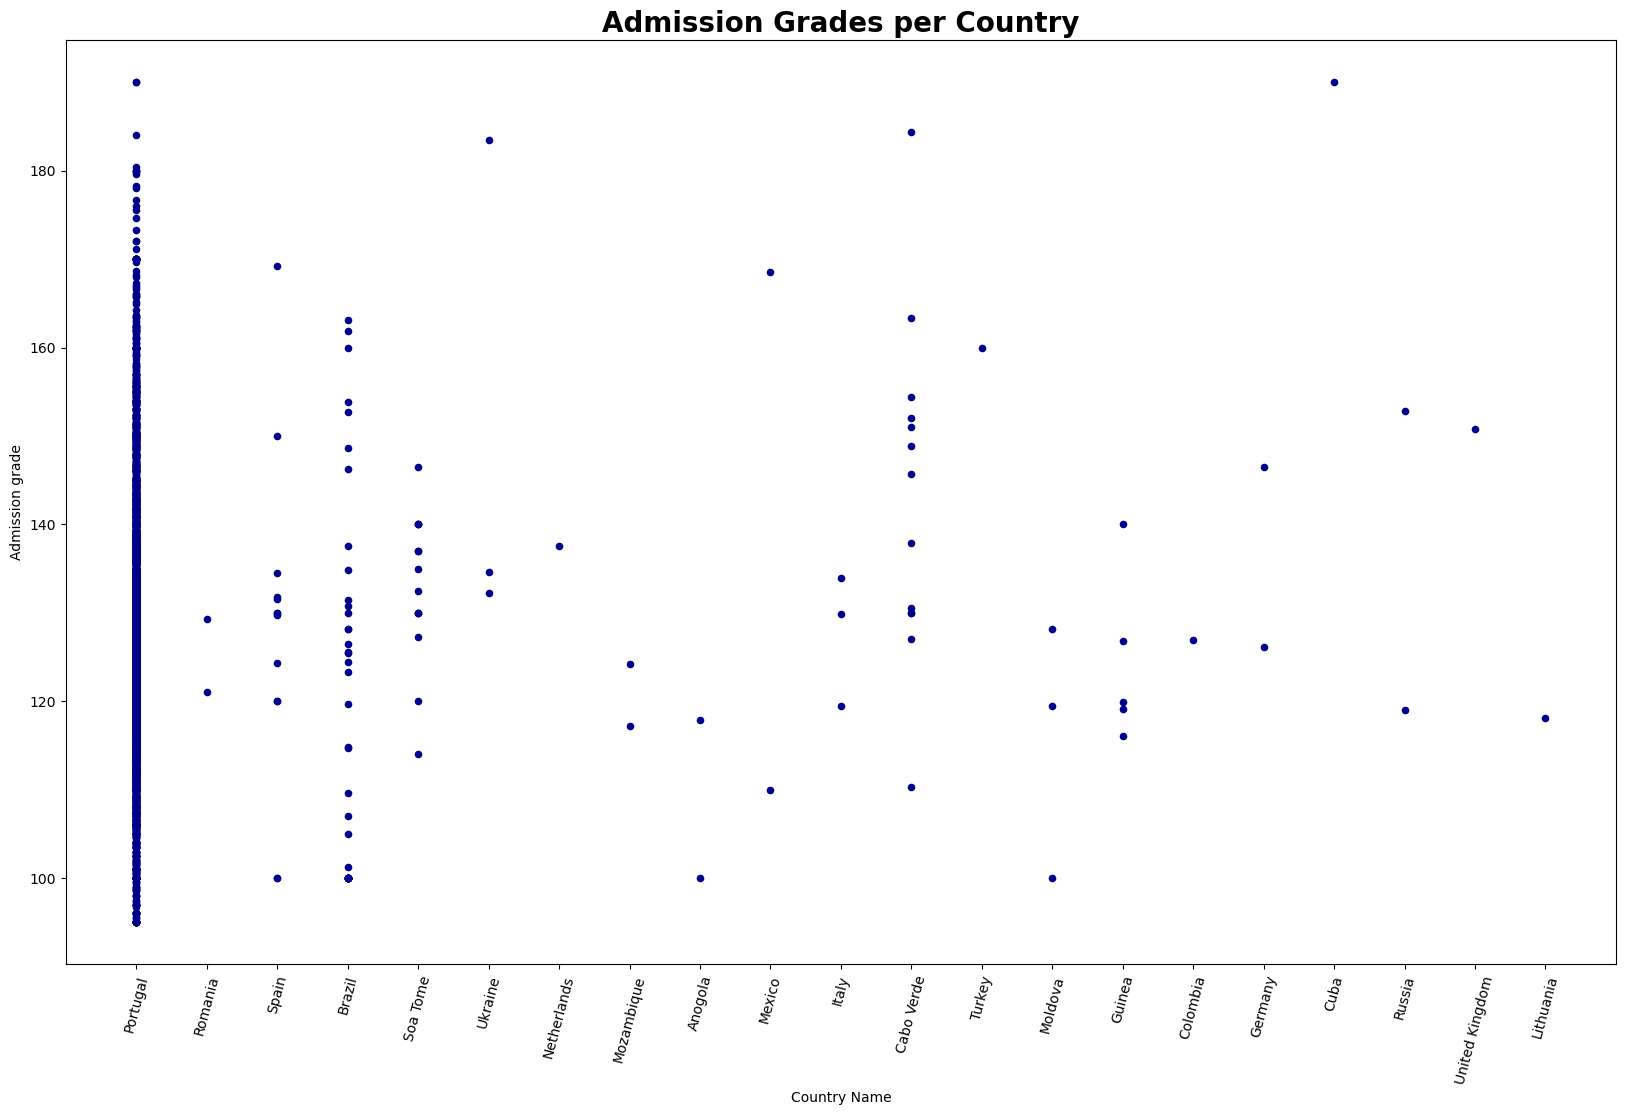

In [27]:
# Scatterplot of admisssion grades per country 
ax1 = admis_grade.plot.scatter(x='Country Name',y='Admission grade', c='DarkBlue', figsize=(20,12), rot=75)
plt.title('Admission Grades per Country', fontsize=20, weight='bold')

### Graduate / Drop-Out Analysis 

In [28]:
# Student succes 
student_success['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [29]:
grads = 2209

In [30]:
dropouts = 1421

In [31]:
# Student success per country 
grad_per_country = student_success['Target'].copy()
grad_per_country= pd.DataFrame(grad_per_country)
grad_per_country.reset_index(inplace=True)
grad_per_country

Country Name    Target
0        Portugal   Dropout
1        Portugal  Graduate
2        Portugal   Dropout
3        Portugal  Graduate
4        Portugal  Graduate
...           ...       ...
4419     Portugal  Graduate
4420       Russia   Dropout
4421     Portugal   Dropout
4422     Portugal  Graduate
4423   Cabo Verde  Graduate

[4424 rows x 2 columns]

###### Drop-Outs 

In [32]:
# Amount of students drop-out per country 
dropouts_per_country = grad_per_country[grad_per_country["Target"] == "Dropout"]
print(dropouts_per_country.value_counts())

Country Name  Target 
Portugal      Dropout    1389
Brazil        Dropout      14
Cabo Verde    Dropout       4
Spain         Dropout       4
Moldova       Dropout       2
Anogola       Dropout       1
Colombia      Dropout       1
Guinea        Dropout       1
Lithuania     Dropout       1
Mexico        Dropout       1
Russia        Dropout       1
Soa Tome      Dropout       1
Ukraine       Dropout       1
dtype: int64


In [33]:
portugal_dropout = dropouts_per_country[dropouts_per_country["Country Name"]=="Portugal"].value_counts()

In [34]:
brazil_dropout = dropouts_per_country[dropouts_per_country["Country Name"]=="Brazil"].value_counts()

In [35]:
# 0ther countires( with less than 5 partipants) total count
other_country_drops = 18

In [36]:
# Function to calacute %
def percentage(part, whole):
  Percentage = (float(part)/float(whole)) * 100
  return str(Percentage)

In [37]:
# Percentage of Portugal student Dropouts 
percentage(portugal_dropout,dropouts)

'97.74806474313863'

In [38]:
# Percentage of Brazilian student Dropouts 
percentage(brazil_dropout,dropouts)

'0.9852216748768473'

In [39]:
# #Percentage of 0ther countires( with less than 5 partipants) dropouts 
percentage(other_country_drops,dropouts)

'1.266713581984518'

###### Graduates 

In [40]:
# Amount of students graduated per country 
graduates_per_country = grad_per_country[grad_per_country["Target"] == "Graduate"]
print(graduates_per_country.value_counts())

Country Name    Target  
Portugal        Graduate    2155
Brazil          Graduate      18
Cabo Verde      Graduate       8
Soa Tome        Graduate       8
Guinea          Graduate       4
Spain           Graduate       4
Italy           Graduate       3
Germany         Graduate       2
Ukraine         Graduate       2
Mexico          Graduate       1
Mozambique      Graduate       1
Netherlands     Graduate       1
Romania         Graduate       1
United Kingdom  Graduate       1
dtype: int64


In [41]:
portugal_grads = graduates_per_country[graduates_per_country["Country Name"]=="Portugal"].value_counts()

In [42]:
brazilian_grads = graduates_per_country[graduates_per_country["Country Name"]=="Brazil"].value_counts()

In [43]:
cabo_grads = graduates_per_country[graduates_per_country["Country Name"]=="Cabo Verde"].value_counts()

In [44]:
soa_grads = graduates_per_country[graduates_per_country["Country Name"]=="Soa Tome"].value_counts()

In [45]:
# 0ther countires( with less than 5 partipants) total count
other_country_grads = 20

In [46]:
# Percentage of Portugal student Graduates
percentage(portugal_grads,grads)

'97.55545495699411'

In [47]:
# Percentage of Brazilian student graduates
percentage(brazilian_grads,grads)

'0.8148483476686283'

In [48]:
# Percentage of Cabo Verbe student graduates
percentage(cabo_grads,grads)

'0.362154821186057'

In [49]:
# Percentage of Soa Tome student graduates
percentage(soa_grads,grads)

'0.362154821186057'

In [50]:
#Percentage of 0ther countires( with less than 5 partipants) Grads 
percentage(other_country_grads,grads)

'0.9053870529651425'

###### Enrollment 

In [51]:
# Amount of students enrolled per country - 
print(grad_per_country[grad_per_country["Target"] == "Enrolled"].value_counts())

Country Name  Target  
Portugal      Enrolled    770
Brazil        Enrolled      6
Soa Tome      Enrolled      5
Spain         Enrolled      5
Anogola       Enrolled      1
Cabo Verde    Enrolled      1
Cuba          Enrolled      1
Moldova       Enrolled      1
Mozambique    Enrolled      1
Romania       Enrolled      1
Russia        Enrolled      1
Turkey        Enrolled      1
dtype: int64


In [52]:
# Amount of students enrolled per country - relative value 
print(grad_per_country[grad_per_country["Target"] == "Enrolled"].value_counts(normalize=True))

Country Name  Target  
Portugal      Enrolled    0.969773
Brazil        Enrolled    0.007557
Soa Tome      Enrolled    0.006297
Spain         Enrolled    0.006297
Anogola       Enrolled    0.001259
Cabo Verde    Enrolled    0.001259
Cuba          Enrolled    0.001259
Moldova       Enrolled    0.001259
Mozambique    Enrolled    0.001259
Romania       Enrolled    0.001259
Russia        Enrolled    0.001259
Turkey        Enrolled    0.001259
dtype: float64


#### Scholarship Holders per Country 

In [53]:
# Dataframe of scholarship holders and graduates/drop outs per country 
scholars_per_country = student_success[['Scholarship holder','Target']]
scholars_per_country= pd.DataFrame(scholars_per_country)
scholars_per_country
scholars_per_country.reset_index(inplace=True)

In [54]:
scholars_per_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country Name        4424 non-null   object
 1   Scholarship holder  4424 non-null   int64 
 2   Target              4424 non-null   object
dtypes: int64(1), object(2)
memory usage: 103.8+ KB


In [55]:
# Ledger: # 1: scholarship holder,  0: nonscholarship holder 
student_success['Scholarship holder'].value_counts()

0    3325
1    1099
Name: Scholarship holder, dtype: int64

In [56]:
scholarship_holders = 1099

In [57]:
nonscholarship_holders = 3325

<Axes: title={'center': 'Scholarship Holders and Graduate/Drop-Out'}, xlabel='Scholarship holder'>

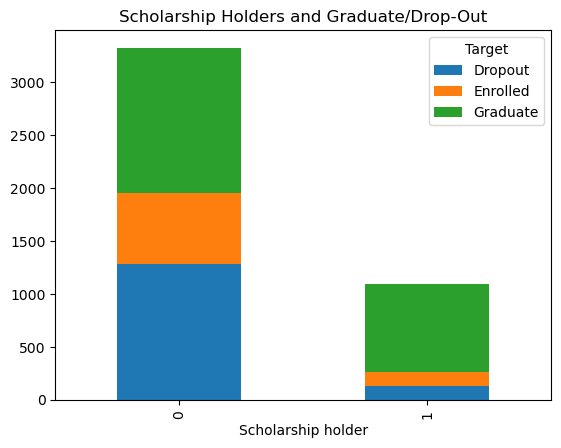

In [58]:
# Bar Graph of Scholarship Holders & NonScholarship Holders 
# Ledger: # 1: scholarship holder,  0: nonscholarship holder 
scholars_per_country.groupby(['Scholarship holder', 'Target']).size().unstack().plot(kind='bar', stacked=True, title='Scholarship Holders and Graduate/Drop-Out')

In [59]:
scholars_per_country.head()

Country Name  Scholarship holder    Target
0     Portugal                   0   Dropout
1     Portugal                   0  Graduate
2     Portugal                   0   Dropout
3     Portugal                   0  Graduate
4     Portugal                   0  Graduate

In [60]:
scholarship_and_nonscholarshop = scholars_per_country[scholars_per_country["Target"] == "Graduate"]

In [61]:
scholarship_holders = scholarship_and_nonscholarshop[scholarship_and_nonscholarshop["Scholarship holder"] == 1]
scholarship_holders.value_counts()

Country Name  Scholarship holder  Target  
Portugal      1                   Graduate    820
Brazil        1                   Graduate      7
Guinea        1                   Graduate      2
Cabo Verde    1                   Graduate      1
Germany       1                   Graduate      1
Italy         1                   Graduate      1
Netherlands   1                   Graduate      1
Romania       1                   Graduate      1
Ukraine       1                   Graduate      1
dtype: int64

In [62]:
#Percentage of holdership holders that gradaute ( whole particants vs scholarship holders )
graduate_scholarshipholder = 835

In [63]:
# Percentage of students who graduated with scholarships (compared to total graduate total) 
percentage(graduate_scholarshipholder,grads)

'37.7999094612947'

In [64]:
# Portugal Scholarship Holders Graduate Count 
port_scholar_grads = scholarship_holders[scholarship_holders["Country Name"]=="Portugal"].value_counts()

In [65]:
# Brazil Scholarship Holders Graduate Rate
braz_scholar_grads = scholarship_holders[scholarship_holders["Country Name"]=="Brazil"].value_counts()

In [66]:
# 0ther countires( with less than 5 partipants) scholarship holders graduate count  
other_scholars = 8 

In [70]:
# Percentage of scholarship holders from Portugal who graduted 
percentage(port_scholar_grads,graduate_scholarshipholder)

'98.20359281437125'

In [71]:
# Percentage of scholarship holders from Brazil who graduted 
percentage(braz_scholar_grads,graduate_scholarshipholder)

'0.8383233532934131'

In [72]:
# Percentage 0ther countires( with less than 5 partipants) scholarship holders graduated
percentage(other_scholars,graduate_scholarshipholder)

'0.9580838323353293'

In [73]:
scholar_dropouts = scholars_per_country[scholars_per_country["Target"] == "Dropout"]
scholar_dropouts.value_counts(normalize=True)

Country Name  Scholarship holder  Target 
Portugal      0                   Dropout    0.885292
              1                   Dropout    0.092189
Brazil        0                   Dropout    0.009148
Cabo Verde    0                   Dropout    0.002815
Spain         0                   Dropout    0.002815
Moldova       0                   Dropout    0.001407
Anogola       0                   Dropout    0.000704
Brazil        1                   Dropout    0.000704
Colombia      1                   Dropout    0.000704
Guinea        0                   Dropout    0.000704
Lithuania     0                   Dropout    0.000704
Mexico        1                   Dropout    0.000704
Russia        0                   Dropout    0.000704
Soa Tome      0                   Dropout    0.000704
Ukraine       0                   Dropout    0.000704
dtype: float64

### Gender  Stats 

In [74]:
# pie chart of student genders , see if you can relate that to succees ( targert column )
# female student = 0 , male students = 1 
gender = student_success['Gender']
gender.value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

In [75]:
female_count = 2868
male_count = 1556

In [76]:
gender = pd.DataFrame(gender)
gender

Gender
Country Name        
Portugal           1
Portugal           1
Portugal           1
Portugal           0
Portugal           0
...              ...
Portugal           1
Russia             0
Portugal           0
Portugal           0
Cabo Verde         0

[4424 rows x 1 columns]

In [77]:
# female students per country 
female_students = gender[gender['Gender']==0]
female_students.reset_index().value_counts()

Country Name    Gender
Portugal        0         2788
Brazil          0           29
Cabo Verde      0           11
Spain           0           10
Soa Tome        0            8
Guinea          0            5
Moldova         0            3
Ukraine         0            2
Russia          0            2
Turkey          0            1
Romania         0            1
Anogola         0            1
Netherlands     0            1
Lithuania       0            1
Italy           0            1
Germany         0            1
Cuba            0            1
Colombia        0            1
United Kingdom  0            1
dtype: int64

In [78]:
# male students per country 
male_students = gender[gender['Gender']==1]
male_students.reset_index().value_counts()

Country Name  Gender
Portugal      1         1526
Brazil        1            9
Soa Tome      1            6
Spain         1            3
Cabo Verde    1            2
Italy         1            2
Mexico        1            2
Mozambique    1            2
Anogola       1            1
Germany       1            1
Romania       1            1
Ukraine       1            1
dtype: int64

In [79]:
# df of gender and target column 
success_per_gender = student_success[['Gender','Target']]
success_per_gender.reset_index(inplace=True)
success_per_gender

Country Name  Gender    Target
0        Portugal       1   Dropout
1        Portugal       1  Graduate
2        Portugal       1   Dropout
3        Portugal       0  Graduate
4        Portugal       0  Graduate
...           ...     ...       ...
4419     Portugal       1  Graduate
4420       Russia       0   Dropout
4421     Portugal       0   Dropout
4422     Portugal       0  Graduate
4423   Cabo Verde       0  Graduate

[4424 rows x 3 columns]

In [80]:
# Female students: Graduate/Dropout/ Enrolled 
female_stats = success_per_gender[success_per_gender['Gender']==0].value_counts()
female_stats

Country Name    Gender  Target  
Portugal        0       Graduate    1619
                        Dropout      697
                        Enrolled     472
Brazil          0       Graduate      17
                        Dropout        8
Cabo Verde      0       Graduate       7
Soa Tome        0       Graduate       5
Spain           0       Enrolled       4
Brazil          0       Enrolled       4
Guinea          0       Graduate       4
Cabo Verde      0       Dropout        3
Spain           0       Graduate       3
                        Dropout        3
Soa Tome        0       Enrolled       2
Moldova         0       Dropout        2
Anogola         0       Dropout        1
Russia          0       Enrolled       1
Turkey          0       Enrolled       1
Ukraine         0       Dropout        1
                        Graduate       1
Soa Tome        0       Dropout        1
Netherlands     0       Graduate       1
Russia          0       Dropout        1
Romania         0       

In [81]:
female_grads = 1661

In [82]:
# Female Graduates (compared to the whole study)
percentage(female_grads,4424)

'37.545207956600365'

In [83]:
# Percentage of Female Students Graduates
percentage(1661,female_count)

'57.91492329149233'

In [84]:
# Percentage of Female Portugal Students who Graduted 
percentage(1619,female_grads)

'97.47140276941602'

In [85]:
# Percentage of Female Brazil Students who Graduted 
percentage(17,female_grads)

'1.0234798314268514'

In [86]:
# Percentage of Female Cabo Verde Students who Graduted 
percentage(7,female_grads)

'0.4214328717639976'

In [87]:
# Percentage of Female Soa Tome Students who Graduted
percentage(5,female_grads)

'0.30102347983142685'

In [88]:
# Other countries Female Graduates 
percentage(5,female_grads)

'0.30102347983142685'

<Axes: title={'center': 'Female Graduates/ Dropouts'}, xlabel='Country Name'>

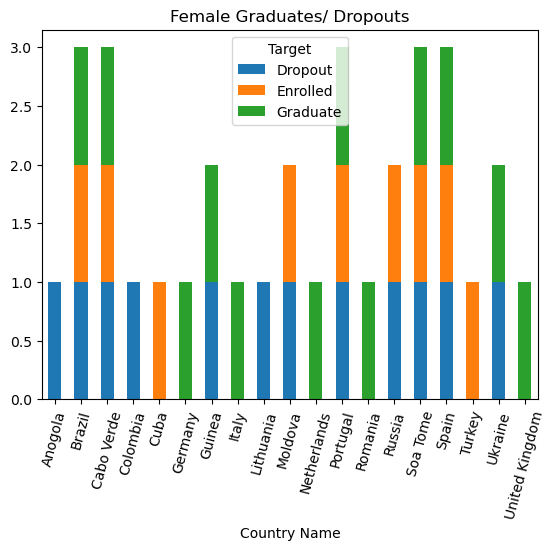

In [89]:
# Stacked Bar graph of female students who graduated, dropout, enrolled 
female_stats.groupby(['Country Name', 'Target']).size().unstack().plot(kind='bar', stacked=True,rot=75,
            title='Female Graduates/ Dropouts')

In [90]:
# Male students: Graduate/Dropout/ Enrolled 
male_stats = success_per_gender[success_per_gender['Gender']==1].value_counts()
male_stats

Country Name  Gender  Target  
Portugal      1       Dropout     692
                      Graduate    536
                      Enrolled    298
Brazil        1       Dropout       6
Soa Tome      1       Graduate      3
                      Enrolled      3
Brazil        1       Enrolled      2
Italy         1       Graduate      2
Anogola       1       Enrolled      1
Spain         1       Graduate      1
                      Enrolled      1
                      Dropout       1
Romania       1       Enrolled      1
Mozambique    1       Graduate      1
                      Enrolled      1
Mexico        1       Graduate      1
                      Dropout       1
Germany       1       Graduate      1
Cabo Verde    1       Graduate      1
                      Dropout       1
Brazil        1       Graduate      1
Ukraine       1       Graduate      1
dtype: int64

In [91]:
male_grads = 548

In [92]:
# Male Graduates (compared to the whole study)
percentage(male_grads,4424)

'12.386980108499095'

In [93]:
# Percentage of Male Students Graduates
percentage(male_grads,male_count)

'35.2185089974293'

In [94]:
# Percentage of male Portugal Students who Graduted 
percentage(536,male_grads)

'97.8102189781022'

<Axes: title={'center': 'Male Graduates/ Dropouts'}, xlabel='Country Name'>

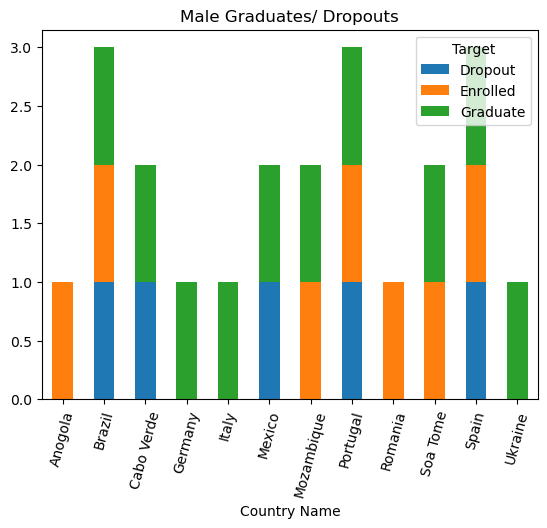

In [95]:
# Stacked Bar graph of male students who graduated, dropout, enrolled 
male_stats.groupby(['Country Name', 'Target']).size().unstack().plot(kind='bar', stacked=True,rot=75,
            title='Male Graduates/ Dropouts')


In [96]:
# DataFrame of Gender , Martial status, Target columns
# Marital status leger: 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
success_per_ms = student_success[['Gender','Target','Marital status']]
success_per_ms.reset_index()

Country Name  Gender    Target  Marital status
0        Portugal       1   Dropout               1
1        Portugal       1  Graduate               1
2        Portugal       1   Dropout               1
3        Portugal       0  Graduate               1
4        Portugal       0  Graduate               2
...           ...     ...       ...             ...
4419     Portugal       1  Graduate               1
4420       Russia       0   Dropout               1
4421     Portugal       0   Dropout               1
4422     Portugal       0  Graduate               1
4423   Cabo Verde       0  Graduate               1

[4424 rows x 4 columns]

In [97]:
# Martial Status Counts 
success_per_ms.value_counts()

Gender  Target    Marital status
0       Graduate  1                 1528
1       Dropout   1                  593
0       Dropout   1                  591
1       Graduate  1                  487
0       Enrolled  1                  433
1       Enrolled  1                  287
0       Graduate  2                   96
1       Dropout   2                   90
0       Dropout   2                   89
1       Graduate  2                   52
0       Enrolled  2                   36
        Dropout   4                   28
        Graduate  4                   27
1       Enrolled  2                   16
0       Enrolled  4                   14
1       Dropout   4                   14
0       Graduate  5                    9
        Dropout   5                    8
1       Graduate  4                    6
        Dropout   5                    3
0       Dropout   6                    3
        Enrolled  3                    2
1       Enrolled  4                    2
                  5     

In [98]:
# DataFrame of Gender, Parent occuplation( Mother & Father) , Target columns
# Mother's occupation: 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants
# Father's occupation: 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers
paternal_occup = student_success[['Target',"Mother's occupation","Father's occupation"]]
paternal_occup

Target  Mother's occupation  Father's occupation
Country Name                                                    
Portugal       Dropout                    5                    9
Portugal      Graduate                    3                    3
Portugal       Dropout                    9                    9
Portugal      Graduate                    5                    3
Portugal      Graduate                    9                    9
...                ...                  ...                  ...
Portugal      Graduate                    5                    4
Russia         Dropout                    9                    9
Portugal       Dropout                    9                    9
Portugal      Graduate                    7                    4
Cabo Verde    Graduate                    5                    9

[4424 rows x 3 columns]

In [99]:
# Gradautes per paternal occupation 
grad_per_po = paternal_occup[paternal_occup['Target']=='Graduate']
grad_per_po

Target  Mother's occupation  Father's occupation
Country Name                                                    
Portugal      Graduate                    3                    3
Portugal      Graduate                    5                    3
Portugal      Graduate                    9                    9
Portugal      Graduate                    9                    7
Portugal      Graduate                    7                   10
...                ...                  ...                  ...
Portugal      Graduate                    9                    9
Portugal      Graduate                    3                    9
Portugal      Graduate                    5                    4
Portugal      Graduate                    7                    4
Cabo Verde    Graduate                    5                    9

[2209 rows x 3 columns]

In [100]:
# diagram of paternal 


In [101]:
# Counts of Parent Occupations
grad_per_po.value_counts().head()

Target    Mother's occupation  Father's occupation
Graduate  9                    9                      387
                               7                      133
          5                    5                      106
          7                    7                       82
          4                    4                       78
dtype: int64

In [102]:
# Mother occup: 9, Father occup: 9 Grads( to total particpant count)
percentage(387,total_students)

'8.747739602169982'

In [103]:
# Mother occup: 9, Father occup: 7 ( to total particpant count)
percentage(133,total_students)

'3.0063291139240507'

In [104]:
# Mother occup: 5, Father occup: 5 ( to total particpant count)
percentage(106,total_students)

'2.396021699819168'

In [105]:
# Mother occup: 7, Father occup: 7 ( to total particpant count)
percentage(82,total_students)

'1.8535262206148282'

In [106]:
# Mother occup: 4, Father occup: 4 ( to total particpant count)
percentage(78,total_students)

'1.763110307414105'

In [107]:
mother_occupation = student_success[["Mother's occupation",'Target']]
mother_occupation =  mother_occupation[mother_occupation['Target']=='Graduate']
mother_occupation.value_counts().head()

Mother's occupation  Target  
9                    Graduate    823
4                    Graduate    422
5                    Graduate    280
3                    Graduate    177
7                    Graduate    144
dtype: int64

In [108]:
# Mother occupation: 9 Grad % 
percentage(832,grads)

'37.66410140334993'

In [109]:
# Mother occupation: 4 Grad %
percentage(422,grads)

'19.10366681756451'

In [110]:
# Mother occupation: 5 Grad %
percentage(280,grads)

'12.675418741511995'

In [111]:
# Mother occupation: 3 Grad %
percentage(177,grads)

'8.012675418741512'

In [112]:
# Mother occupation: 7 Grad %
percentage(144,grads)

'6.518786781349027'

In [113]:
father_occupation = student_success[["Father's occupation",'Target']]
father_occupation =  father_occupation[father_occupation['Target']=='Graduate']
father_occupation.value_counts().head()

Father's occupation  Target  
9                    Graduate    524
7                    Graduate    371
5                    Graduate    261
3                    Graduate    207
4                    Graduate    173
dtype: int64

In [114]:
# Father's occupation: 9  Grad %
percentage(524,grads)

'23.721140787686736'

In [115]:
# Father's occupation: 7  Grad %
percentage(371,grads)

'16.794929832503396'

In [116]:
# Father's occupation: 5  Grad %
percentage(261,grads)

'11.815301041195111'

In [117]:
# Father's occupation: 3  Grad %
percentage(207,grads)

'9.370755998189226'

In [118]:
# Father's occupation: 4  Grad %
percentage(173,grads)

'7.831598008148484'

In [119]:
# Dropouts per paternal occupation 
grad_per_drop = paternal_occup[paternal_occup['Target']=='Dropout']
grad_per_drop

Target  Mother's occupation  Father's occupation
Country Name                                                   
Portugal      Dropout                    5                    9
Portugal      Dropout                    9                    9
Portugal      Dropout                    9                    9
Portugal      Dropout                    4                    7
Portugal      Dropout                    4                    9
...               ...                  ...                  ...
Portugal      Dropout                    9                    9
Portugal      Dropout                    9                    3
Portugal      Dropout                    6                    6
Russia        Dropout                    9                    9
Portugal      Dropout                    9                    9

[1421 rows x 3 columns]

In [120]:
#Counts 
grad_per_drop.value_counts().head()

Target   Mother's occupation  Father's occupation
Dropout  9                    9                      241
         0                    0                       69
         4                    4                       55
         9                    7                       52
         5                    5                       52
dtype: int64

## Summary 

Portugal came in first with the most participants making up 97% of the data with 4314 participants. This could be a result of available education in the country or it can be due to the geographic location of the insulation. Brazil came in second with 0.85%. With Turkey, Netherlands, Colombia, Cuba, United Kingdom, and Lithuania coming in under 0.026%. I choose to focus on the educational enrollment of each country (based on the participants' nationality) focusing on 2 features: adjustment net enrollment of lower secondary and tertiary education enrollment. In lower secondary enrollment, Lithuania came first with 99.41, the United Kingdom second with 96.08, and Spain in third with 94.08. Mozambique had the lowest secondary enrollment. When analyzing tertiary education enrollment, Brazil had the highest enrollment with 8072146. Turkey came second with an enrollment of 5472521, and Mexico with the third highest enrollment of 3419391. It was not a surprise to see that Portugal was on the lower end of tertiary education enrollment as a majority of the participants were from Portugal. Indicating a possibility that most students in Portugal seek tertiary education outside of Portugal. 
Next I proceed to check the admission grades of each county, averaging only the countries with at least 5 participants or more. Cabo Verde came in with the highest admission grade averaging 143.49. Portugal averaged 126.92, Brazil with 121.18, Soa Tome with 132.81, Spain with 128.55, and finally Guinea averaged 124.38. 

Analyzing the student data, 2209 students graduated while 1421 dropped out. Portugal came up with the highest drop-out with 97.7%. This is not the best global indication as the participants were majority from Portugal.  Brazilian students  had less than <1% drop out rate. Participants from Angola, Colombia, Guinea, Lithuania, Mexico, Russia, Sao Tome, and Ukraine made up less than 2% of the drop-outs.  As expected Portugal resulted with the highest graduation rate with 2155 participants, making up 97.5% of the graduates. Brazilian students came in second again making up less than 1% of the graduates. Guinea, Spain, Italy , Germany, Ukraine, Mexico, Mozambique, Netherlands, Romania, and Uk  made up about 1% of the graduates.  
Next I analyzed the relationship between scholarship holder and graduate rates. There were a total of 1099 scholarship holders and 3325 non-scholarship holders. 75% of the scholarship holders graduated ( compared to all scholarship holders); making up 37% compared to the total graduate count. From Portugal 98% of the participants who were scholarship holders graduated while 9% dropped out. Less than 1% of Brazilian, Spaniard, Guinea , and Mexican partiants graduated and dropped out who were scholarship holders. 

There were a total of 4,424 participants: 2868 female  and 1556 male. Females made up 37% of the graduates and males made up 12% . Portugal had the highest graduating female count with 1619; making up 97% of the female graduates . Italy, the United Kingdom, Germany, Ukraine all tied with 1%. Portugal came in first again with the most males graduating with 692; making up 98% of the male graduates. Lastly I analyzed the relationship between paternal occupation and grad rates. Participants who’s mother’s occupation was “unskilled worker” made up 37% of the graduates while participant’s fathers occupation was “ unskilled worker” made up 23% of the graduates. 
